# Setup

In [2]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 9.4MB/s 
  Found existing installation: pip 19.0.3
    Uninstalling pip-19.0.3:
      Successfully uninstalled pip-19.0.3


In [3]:
!pip3 install quandl

  Using cached Quandl-3.5.0-py2.py3-none-any.whl (25 kB)
  Using cached inflection-0.4.0-py2.py3-none-any.whl (5.8 kB)


In [129]:
import quandl
import pandas as pd
import stocker
quandl.ApiConfig.api_key = '1MN4xbFX3wwQNXvao-9-'
# quandl.ApiConfig.api_version = '2015-04-09'

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas_datareader import data
import datetime as dt

In [64]:
# quandl.bulkdownload("GILD")
from pytrends.request import TrendReq

In [50]:
data = quandl.get("WIKI/GILD", returns="numpy")

In [51]:
data.shape

(6594,)

In [52]:
df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of            Date   Open   High    Low  Close     Volume  Ex-Dividend  \
0    1992-01-22  17.25  21.75  17.25  20.25  5250700.0          0.0   
1    1992-01-23  21.00  22.75  20.25  22.00  1199000.0          0.0   
2    1992-01-24  22.25  23.25  21.50  22.25   376400.0          0.0   
3    1992-01-27  23.25  24.00  22.25  24.00   334900.0          0.0   
4    1992-01-28  23.75  24.25  22.75  23.50   622300.0          0.0   
...         ...    ...    ...    ...    ...        ...          ...   
6589 2018-03-21  76.74  77.44  76.21  76.49  5649040.0          0.0   
6590 2018-03-22  75.85  76.76  75.04  75.57  7508181.0          0.0   
6591 2018-03-23  75.38  75.62  72.73  72.84  8976615.0          0.0   
6592 2018-03-26  74.17  75.71  73.57  75.54  7186457.0          0.0   
6593 2018-03-27  75.98  76.15  73.55  74.11  6185615.0          0.0   

      Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
0             1.0   0.509500   0.642412

In [53]:
# quandl.bulkdownload("NSE")

In [131]:
# start is calculated as 365 days X years
years = 12
end = dt.datetime.today().strftime('%Y-%m-%d')  # today as the end date
start = (dt.datetime.today() - dt.timedelta(days=365*years)).strftime('%Y-%m-%d')  
GILD = data.DataReader('GILD', 'yahoo', start, end)
SGEN = data.DataReader('SGEN', 'yahoo', )

In [107]:
# nested column set in df
df = data.DataReader(('GILD', 'SGEN'), 'yahoo', start, end)

In [122]:
# df.head()
df['Adj Close', 'GILD']

Date
2008-05-08    23.480888
2008-05-09    23.276936
2008-05-12    23.641451
2008-05-13    23.203165
2008-05-14    22.808268
                ...    
2020-04-29    83.139999
2020-04-30    84.000000
2020-05-01    79.949997
2020-05-04    80.250000
2020-05-05    79.586403
Name: (Adj Close, GILD), Length: 3019, dtype: float64

In [54]:
# GILD = quandl.get('WIKI/GILD')


# SGEN = quandl.get('WIKI/SGEN')

In [128]:
type(GILD)

GILD.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [55]:

# from pandas.io.json import json_normalize
# json_normalize
# !pip install -U pandas

In [56]:
# !pip install --upgrade pip setuptools

# !pip install stocker
# !python3 -m pip install stocker
# from stocker import Stocker

# this is a working source https://github.com/jcamiloangarita/stocker
# import stocker

In [57]:
# amazon = Stocker('AMZN')
stocker.predict.tomorrow('AMZN')

[2334.12, 2.393, '2020-05-05']

In [58]:
# amazon.plot_stock()

In [59]:
# Stocker('GILD')

In [60]:
# import statsmodels.api as sm
# SARIMAXResults.get_prediction()


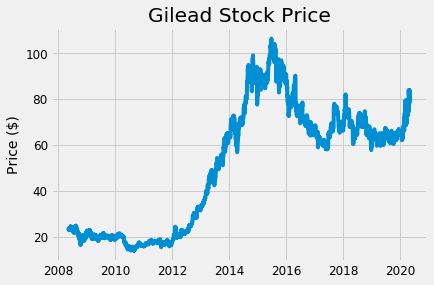

In [106]:
# The adjusted close accounts for stock splits, so that is what we should graph
# plt.plot(GILD.index, GILD['Adj. Close'])
plt.plot(GILD.index, GILD['Adj Close'])
plt.title('Gilead Stock Price')
plt.ylabel('Price ($)')
plt.show()

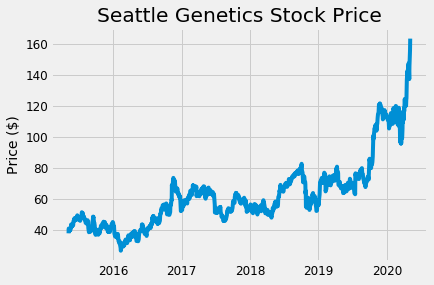

In [132]:
# plt.plot(SGEN.index, SGEN['Adj. Close'])
plt.plot(SGEN.index, SGEN['Adj Close'])
plt.title('Seattle Genetics Stock Price')
plt.ylabel('Price ($)')
plt.show()

In [133]:
# !pip install --upgrade --force-reinstall holidays # version '0.10.2'
GILD.tail()
SGEN.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-29,144.880005,137.809998,144.190002,138.080002,1014900,138.080002
2020-04-30,140.899994,136.699997,138.990005,137.229996,2036700,137.229996
2020-05-01,157.000000,140.050003,141.000000,145.639999,2800000,145.639999
2020-05-04,155.889999,145.009995,145.009995,155.759995,2072200,155.759995
2020-05-05,164.440002,160.500000,163.119003,163.270004,613094,163.270004


In [18]:
# !python3 -m pip install fbprophet
#from dateutil.easter import easter # fix for ImportError: cannot import name 'easter' from 'holidays' 
#(/Users/dpong/anaconda3/lib/python3.7/site-packages/holidays/__init__.py)
import plotly
import fbprophet
print(fbprophet.__version__)

0.6


In [19]:
import plotly.graph_objects as go
# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# fig.write_html('first_figure.html', auto_open=True)

In [20]:
GILD.reset_index(inplace = True)

In [21]:
# Prophet requires columns ds (Date) and y (value)

gild = GILD.rename(columns={'Date': 'ds', 'Adj. Close': 'y'})

In [22]:
gild

,ds,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,y,Adj. Volume
0,1992-01-22,17.25,21.75,17.25,20.25,5250700.0,0.0,1.0,0.509500,0.642412,0.509500,0.598108,168022400.0
1,1992-01-23,21.00,22.75,20.25,22.00,1199000.0,0.0,1.0,0.620260,0.671949,0.598108,0.649796,38368000.0
2,1992-01-24,22.25,23.25,21.50,22.25,376400.0,0.0,1.0,0.657181,0.686717,0.635028,0.657181,12044800.0
3,1992-01-27,23.25,24.00,22.25,24.00,334900.0,0.0,1.0,0.686717,0.708869,0.657181,0.708869,10716800.0
4,1992-01-28,23.75,24.25,22.75,23.50,622300.0,0.0,1.0,0.701485,0.716253,0.671949,0.694101,19913600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589,2018-03-21,76.74,77.44,76.21,76.49,5649040.0,0.0,1.0,76.740000,77.440000,76.210000,76.490000,5649040.0
6590,2018-03-22,75.85,76.76,75.04,75.57,7508181.0,0.0,1.0,75.850000,76.760000,75.040000,75.570000,7508181.0
6591,2018-03-23,75.38,75.62,72.73,72.84,8976615.0,0.0,1.0,75.380000,75.620000,72.730000,72.840000,8976615.0
6592,2018-03-26,74.17,75.71,73.57,75.54,7186457.0,0.0,1.0,74.170000,75.710000,73.570000,75.540000,7186457.0


# Effect of Changepoint Prior Scale

changepoint_prior_scale is parameter for the model to indicate how flexible the changepoints are allowed to be. In other words, to what extent can the changepoints fit to the data. I find out that it can't be too extreme. It can't be too small of a scale and too big of a scale. The higher it is, the more flexible the model will be. The drawback is you might end up overfitting.

In [91]:
# Try 3 different changepoints
for changepoint in [.0015, .15, 15]:
        model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
        model.fit(gild)
        
        future = model.make_future_dataframe(periods=365, freq = 'D')
        future = model.predict(future)
        
        gild[changepoint] = future['yhat']

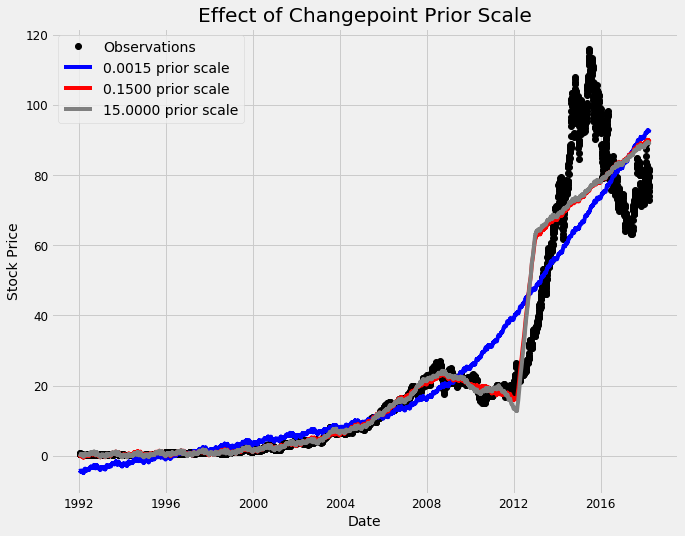

In [93]:
# Create the plot
plt.figure(figsize=(10, 8))

# Actual observations
plt.plot(gild['ds'], gild['y'], 'ko', label = 'Observations')
colors = {.0015: 'b', .15: 'r', 15: 'grey'}

# Plot each of the changepoint predictions
for changepoint in [.0015, .15, 15]:
    plt.plot(gild['ds'], gild[changepoint], color = colors[changepoint], label = '%.4f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date'); plt.ylabel('Stock Price'); plt.title('Effect of Changepoint Prior Scale');

# changepoint_prior_scale = 0.15 is what I end up using

In [74]:
gild_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gild_prophet.fit(gild)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
# Make a future dataframe for 1 year
gild_forecast = gild_prophet.make_future_dataframe(periods=365 , freq='D')

# Make predictions 
gild_forecast = gild_prophet.predict(gild_forecast)

Text(0.5, 1, 'Stock Prices of Gilead (GILD)')

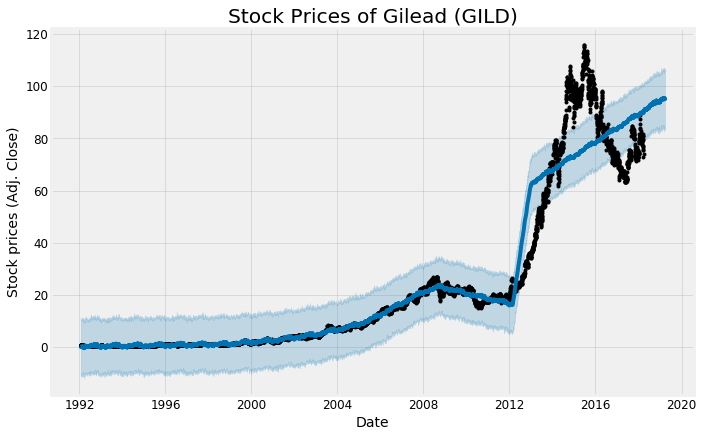

In [25]:
gild_prophet.plot(gild_forecast, xlabel = 'Date', ylabel = 'Stock prices (Adj. Close)')
plt.title('Stock Prices of Gilead (GILD)')

In [86]:
gild_prophet.changepoints[:10]

211    1992-11-19
422    1993-09-22
633    1994-07-25
844    1995-05-24
1055   1996-03-25
1266   1997-01-23
1477   1997-11-21
1688   1998-09-25
1899   1999-07-29
2110   2000-05-30
Name: ds, dtype: datetime64[ns]

In [32]:
gild_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [33]:
# !sudo pip3 install --upgrade pandas==0.25.3
# conda install -c conda-forge fbprophet==0.6

# Trends and Patterns

<Figure size 432x288 with 0 Axes>

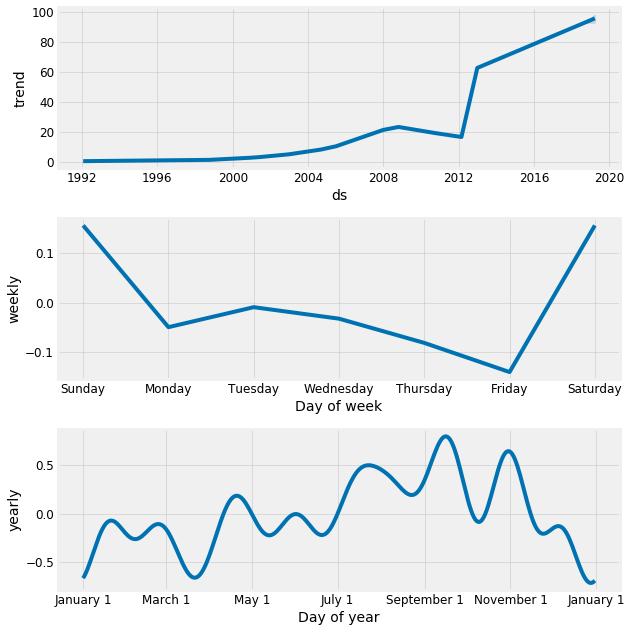

In [38]:
# Plot the trends and patterns
gild_prophet.plot_components(gild_forecast);